In [1]:
 !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf
import pandas as pd

### Step 2: Keypoints using MP Holistic

In [3]:
#holistic model--to actually make our detections
mp_holistic=mp.solutions.holistic

#drawing utilities -- to draw these detections
mp_drawing=mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image,model):
    
    #color conversion [opencv(bgr) ,holistics require rgb format]
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #image is no longer writeable(Making the image non-writable is a common practice to ensure data integrity and prevent unintended modifications.)
    image.flags.writeable=False
    
    #make predictions
    results=model.process(image)
    
    ##image now writeable
    image.flags.writeable=True
    
    #color convert RGB to BGR
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    return image,results

In [5]:
# mp_drawing.draw_landmarks() function from the MediaPipe library to draw landmarks on an image.

# Here's an explanation of the parameters used in the function:

# image: The input image on which the landmarks are to be drawn.
# results.face_landmarks: The landmarks detected for the face in the image.
# mp_holistic.FACE_CONNECTIONS: Specifies the connections between the facial landmarks to be drawn. This constant is provided by the mp_holistic module in MediaPipe.
# mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1): Specifies the drawing specifications for the landmarks, including color, thickness, and circle radius. This is the specification for drawing the landmarks themselves.
# mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1): Specifies the drawing specifications for the connections between the landmarks. This is the specification for drawing the connections between the landmarks.

In [6]:
# def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connecti

In [7]:
def draw_styled_landmarks(image,results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(60,42,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        # Break loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.pose_landmarks.landmark)  #.landmark makeit a list

33

In [10]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

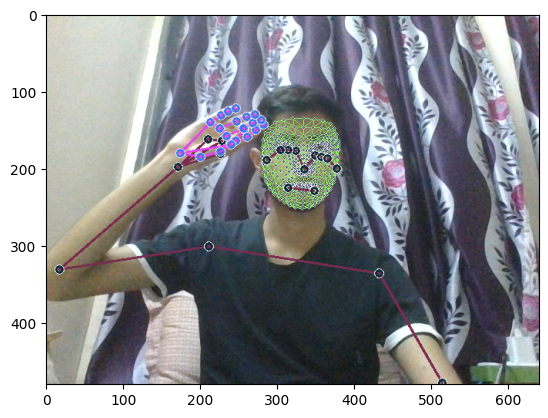

In [11]:
draw_styled_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### Step 3: Extract Keypoint Values

In [12]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
len(results.face_landmarks.landmark)*3

1404

In [14]:
len(results.pose_landmarks.landmark)*4

132

In [15]:
extract_keypoints(results)

array([ 0.52406353,  0.41978529, -0.69212532, ...,  0.38525382,
        0.25529248,  0.00826724])

### Step 4: Setup  Folders for collection

In [16]:
# Path for exported data, numpy arrays
data_path = os.path.join('MP_Data') 

# Actions that we will try to detect
actions = np.array(['hello', 'thanks', 'good','wish'])

# Thirty videos worth of each data
no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
actions

array(['hello', 'thanks', 'good', 'wish'], dtype='<U6')

In [18]:
for action in actions:
    for no in range(no_sequences):
        try:
            os.makedirs(os.path.join(data_path,action,str(no)))
        except:
            pass
        
        
        #Collection breaks: having breaks b/w each sequence collection allows to rest and reposition yourself to collect the action from start to end

### Step 5: Collect Keypoint Values for train and test dataset

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #loop through actions
    for action in actions:
       
        #loop through sequences or videos
        for sequence in range(no_sequences):
            
            #loop through video length(30 frmes of keypoints per video)
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                #apply logic for collection
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(7000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                  
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break loop
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

### Step 6: Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map={label:num for num,label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'good': 2, 'wish': 3}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
x=np.array(sequences)
x.shape

(160, 30, 1662)

In [24]:
np.array(labels).shape

(160,)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [27]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [29]:
y_train.shape

(152, 4)

In [30]:
x_train.shape

(152, 30, 1662)

### Step 7: Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)# 
tb_callback = tf.keras.callbacks.History()

In [33]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))  #to stack lstm layers return sequence=true
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
5/5 [==============================] - 4s 75ms/step - loss: 2.1176 - categorical_accuracy: 0.1974
Epoch 2/1000
5/5 [==============================] - 0s 80ms/step - loss: 1.6013 - categorical_accuracy: 0.2105
Epoch 3/1000
5/5 [==============================] - 0s 78ms/step - loss: 1.5971 - categorical_accuracy: 0.2566
Epoch 4/1000
5/5 [==============================] - 0s 69ms/step - loss: 1.4664 - categorical_accuracy: 0.2105
Epoch 5/1000
5/5 [==============================] - 0s 70ms/step - loss: 1.4006 - categorical_accuracy: 0.2829
Epoch 6/1000
5/5 [==============================] - 0s 75ms/step - loss: 1.3965 - categorical_accuracy: 0.2697
Epoch 7/1000
5/5 [==============================] - 0s 77ms/step - loss: 1.3741 - categorical_accuracy: 0.3092
Epoch 8/1000
5/5 [==============================] - 0s 74ms/step - loss: 1.3629 - categorical_accuracy: 0.3487
Epoch 9/1000
5/5 [==============================] - 0s 86ms/step - loss: 1.2683 - categorical_accuracy: 0.4539
E

5/5 [==============================] - 0s 92ms/step - loss: 0.3251 - categorical_accuracy: 0.8355
Epoch 75/1000
5/5 [==============================] - 0s 93ms/step - loss: 0.2736 - categorical_accuracy: 0.8684
Epoch 76/1000
5/5 [==============================] - 0s 87ms/step - loss: 0.2668 - categorical_accuracy: 0.8750
Epoch 77/1000
5/5 [==============================] - 0s 91ms/step - loss: 0.2563 - categorical_accuracy: 0.8947
Epoch 78/1000
5/5 [==============================] - 0s 89ms/step - loss: 0.2437 - categorical_accuracy: 0.8618
Epoch 79/1000
5/5 [==============================] - 0s 90ms/step - loss: 0.2705 - categorical_accuracy: 0.8947
Epoch 80/1000
5/5 [==============================] - 0s 86ms/step - loss: 0.3140 - categorical_accuracy: 0.8816
Epoch 81/1000
5/5 [==============================] - 0s 95ms/step - loss: 0.2560 - categorical_accuracy: 0.8947
Epoch 82/1000
5/5 [==============================] - 0s 86ms/step - loss: 0.3076 - categorical_accuracy: 0.8355
Epoch 

KeyboardInterrupt: 

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### Step 8: predictions

In [37]:
res=model.predict(x_test)

1/1 [==============================] - 0s 349ms/step


In [38]:
actions[np.argmax(res[1])]

'thanks'

In [39]:
actions[np.argmax(y_test[1])]

'thanks'

### Step 9: save weights

In [ ]:
# model.save('classes1.h5')
# model.load_weights('classes1.h5')

### Step 10: 10. Evaluation using Confusion Matrix and Accuracy

In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB

In [41]:
ypred = model.predict(x_test)

1/1 [==============================] - 0s 41ms/step


In [42]:

# convert one hot encoded representation to categorical label e.g. 0,1,2 as opposed to [1,0,0,0],[0,1,0,0],[0,0,1,0]
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()

In [43]:
ytrue

[0, 1, 1, 3, 3, 2, 2, 2]

In [44]:
ypred

[0, 1, 1, 3, 3, 2, 2, 2]

In [45]:
multilabel_confusion_matrix(ytrue, ypred)

array([[[7, 0],
        [0, 1]],

       [[6, 0],
        [0, 2]],

       [[5, 0],
        [0, 3]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [46]:
accuracy_score(ytrue, ypred)

1.0

In [47]:
ypred = model.predict(x_train)
ytrue = np.argmax(y_train, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()

5/5 [==============================] - 0s 23ms/step


In [48]:
multilabel_confusion_matrix(ytrue, ypred)

array([[[112,   1],
        [ 15,  24]],

       [[114,   0],
        [  0,  38]],

       [[100,  15],
        [  1,  36]],

       [[114,   0],
        [  0,  38]]], dtype=int64)

In [49]:
ytestpred = model.predict(x_test)
ytesttrue = np.argmax(y_test, axis=1).tolist()
ytestpred = np.argmax(ytestpred, axis=1).tolist()

1/1 [==============================] - 0s 41ms/step


In [50]:
print("                    Classification Report")
print(classification_report(ytesttrue, ytestpred))

                    Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [51]:
accuracy_score(ytrue, ypred)


0.8947368421052632

In [52]:
print("                    Classification Report")
print(classification_report(ytrue, ypred))
# print(confusion_matrix(y_test, ypred))

# MNB_f1 = round(f1_score(y_test, ypred, average='weighted'), 3)
# MNB_accuracy = round((accuracy_score(y_test, ypred)*100),2)

# print("Accuracy : " , MNB_accuracy , " %")
# print("f1_score : " , MNB_f1)

                    Classification Report
              precision    recall  f1-score   support

           0       0.96      0.62      0.75        39
           1       1.00      1.00      1.00        38
           2       0.71      0.97      0.82        37
           3       1.00      1.00      1.00        38

    accuracy                           0.89       152
   macro avg       0.92      0.90      0.89       152
weighted avg       0.92      0.89      0.89       152



In [ ]:
!pip install seaborn

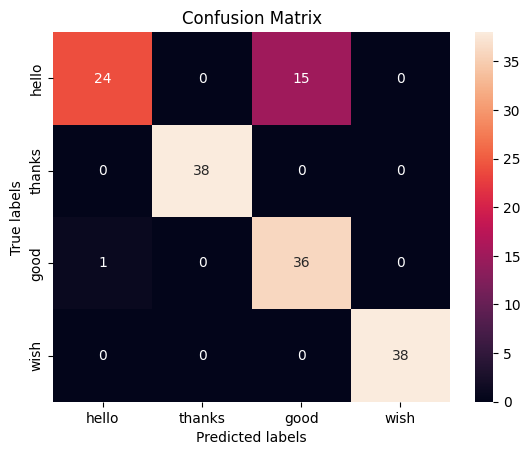

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(ytrue,ypred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['hello', 'thanks','good','wish']); ax.yaxis.set_ticklabels(['hello', 'thanks','good','wish']);

In [54]:

tb_callback.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

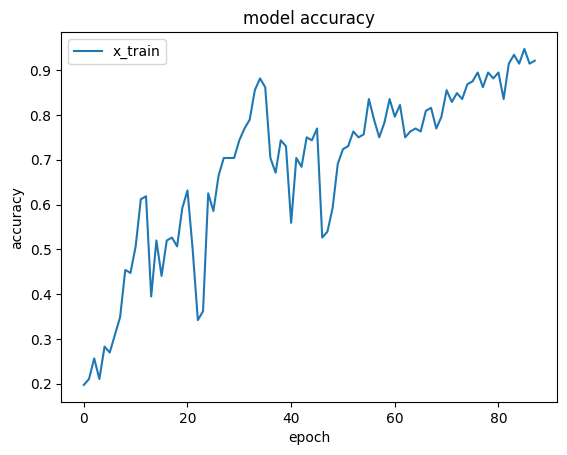

In [55]:
plt.plot(tb_callback.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['x_train'],loc='upper left')
plt.show()

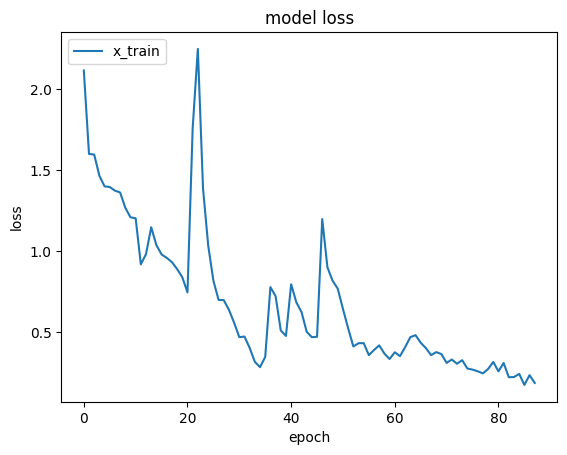

In [56]:
plt.plot(tb_callback.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['x_train'],loc='upper left')
plt.show()

### Step 10: Test in Real time

In [ ]:
sequence=[] # to collect 30 frames and after it pass to our prediction algorithm
sentence=[] #concatenate history of detections
threshold=0.7 #render results if they are above certain threshold
predictions=[]

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()